In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datapath = 'donnees/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# Load the data
data = pd.read_csv(datapath, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

data = data.dropna()

data = data.reset_index(drop = True)

In [76]:
data["Displacement"] = 1/data["Displacement"]
data["Horsepower"] = 1/data["Horsepower"]
data["Weight"] = 1/data["Weight"]
data["Cylinders"] = 1/data["Cylinders"]

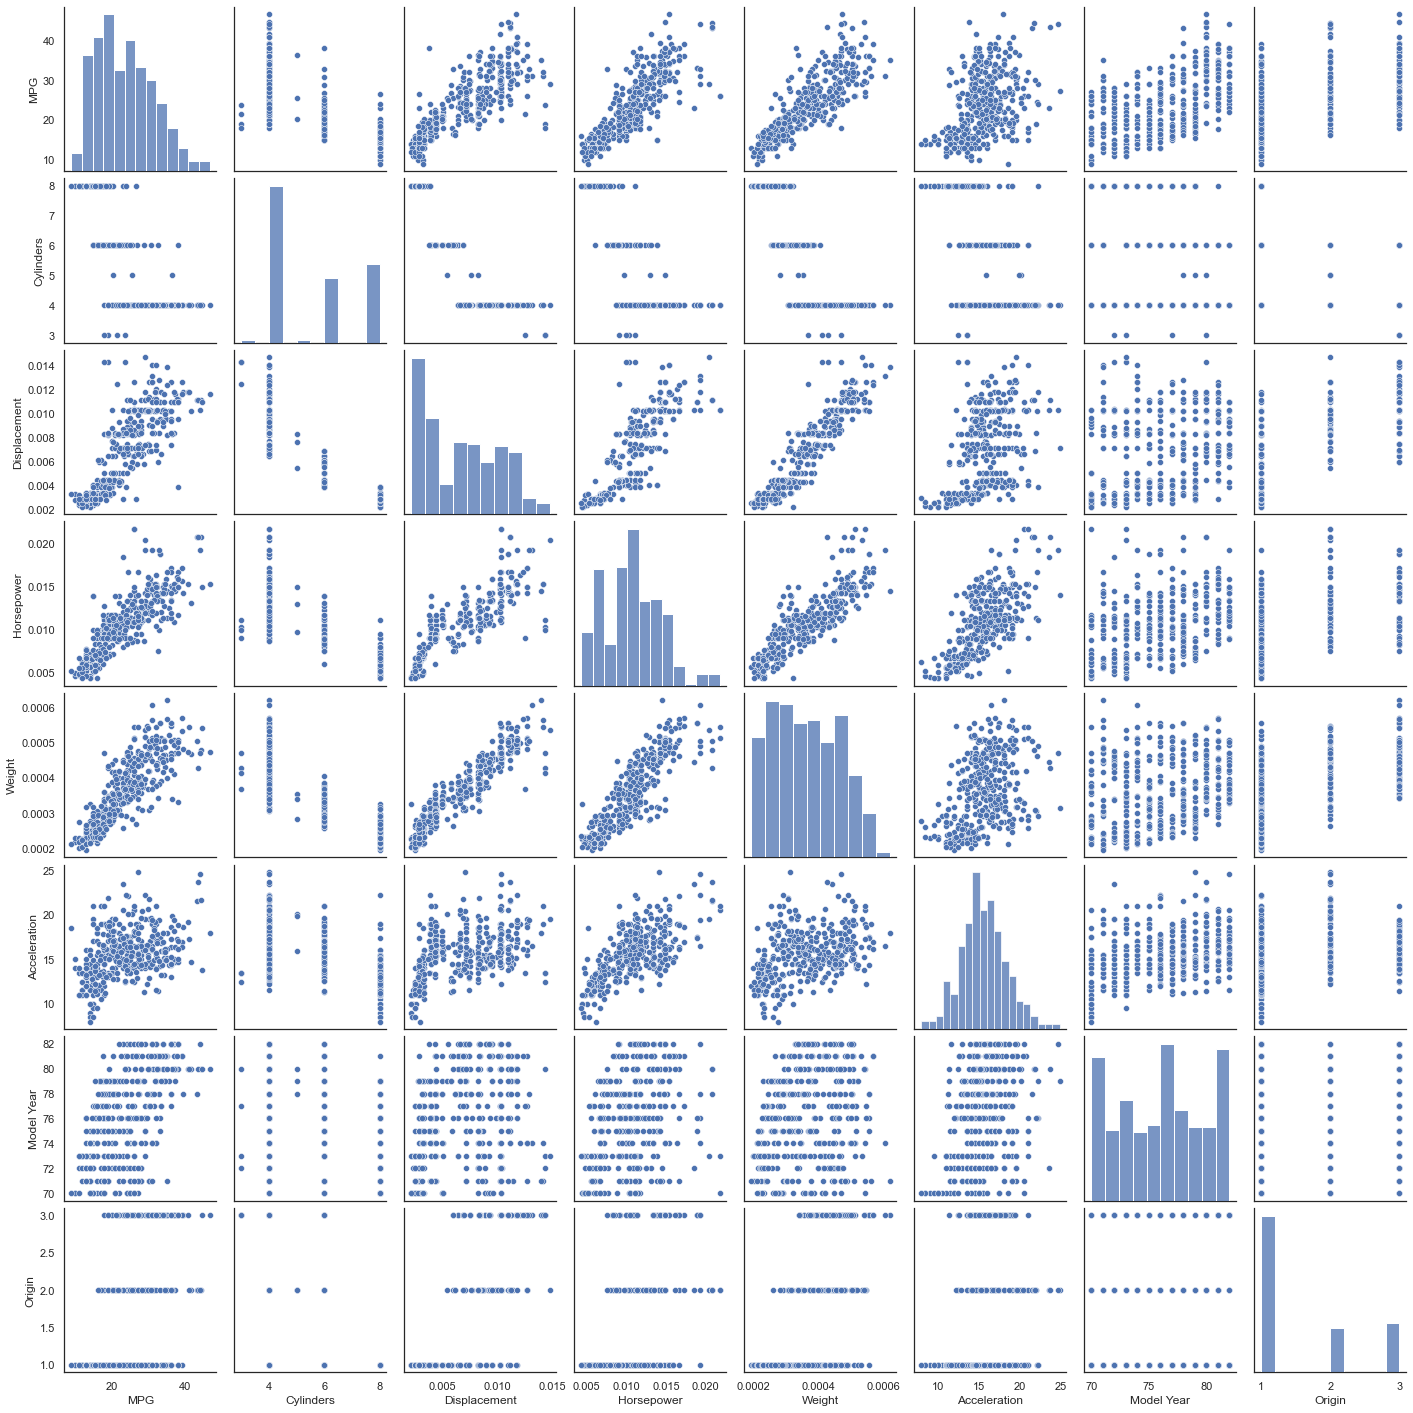

In [26]:
sns.set(style="white", color_codes=True)
sns.pairplot(data=data)
plt.show()

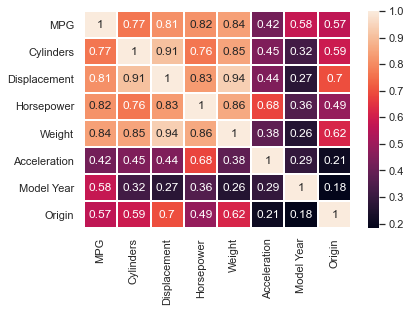

In [77]:
correlation = data.corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation, annot=True, linewidths=1.0)
plt.show()

In [70]:
print(max(data["MPG"]))
print(min(data["MPG"]))

# Stratification : découpage avec cut en strates



data["MPG_disc"] = pd.cut(data["MPG"],
                          bins=[0, 20, 30, 40, 50],
                          labels=["0 - 20"  , "21 - 30", "31 - 40", "41 - 50"])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2,
                               random_state=42)

for train_index, test_index in split.split(data, data["MPG_disc"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

print(strat_train_set.shape)
print(strat_test_set.shape)



46.6
9.0
(313, 9)
(79, 9)


In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# One hot lles valeurs 

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_attribs = ["Displacement", "Horsepower", "Weight"]
cat_attribs = ["Cylinders","Model Year"]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(strat_train_set)
y_train = np.array(strat_train_set["MPG"])

X_test = full_pipeline.fit_transform(strat_test_set)
y_test = np.array(strat_test_set["MPG"])

strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.5))

model.fit(X_train, y_train)

metric1 = {'modele': 'model 1',
          'mean_absolute_error': mean_absolute_error(y_test, model.predict(X_test)),
          'mean_squared_error': mean_squared_error(y_test, model.predict(X_test)),
          'r2_score':r2_score(y_test, model.predict(X_test))
         }

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [79]:
print(metric1["r2_score"])

0.7542303418294524
